In [23]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

# 로이터 뉴스 데이터셋 불러오기
from keras.datasets import reuters
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.preprocessing import sequence
from keras.utils import np_utils

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [24]:
# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

## 학습셋, 테스트셋으로 나누기

In [25]:
# num_words=1000 : 빈도가 1~1000에 해당하는 단어만 선택해서 불러오기
(X_train, Y_train), (X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2)

# 데이터 확인하기
category = numpy.max(Y_train) + 1  # Y_train의 종류
print(category, '개의','카테고리')
print('학습용 뉴스 기사 : ', len(X_train))
print('테스트용 뉴스 기사 : ', len(X_test))

# 해당 단어가 몇 번이나 나타나는지 세어 빈도에 따라 번호를 붙임 (3 : 세 번째로 빈도가 높은 단어)
# 이 작업을 위해 tokenizer() 함수를 사용하는데, keras에서는 이 작업이 되어있는 데이터를 불러올 수 있음
print(Y_train)

46 개의 카테고리
학습용 뉴스 기사 :  8982
테스트용 뉴스 기사 :  2246
[ 3  4  3 ... 25  3 25]


## 데이터 전처리

In [26]:
# 각 기사의 단어 수가 다르므로 단어의 숫자를 맞춰줘야 한다. ==> sequence
# maxlen=100 : 단어수는 100개로 맞춘다.(100개보다 적을 경우 0으로 채운다.)
x_train = sequence.pad_sequences(X_train, maxlen=100)
x_test = sequence.pad_sequences(X_test, maxlen=100)

# 원-핫 인코딩
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

## 모델 설정
- Embedding 층 : 데이터 전처리 과정을 통해 입력된 값을 받아 다음 층이 알아들을 수 있는 형태로 변환 하는 역할
  - Embedding('불러온 단어의 총 개수','기사당 단어 수')
- LSTM(기사당 단어 수, 기타 옵션)

In [27]:
model = Sequential()
model.add(Embedding(1000, 100))
model.add(LSTM(100, activation='tanh'))
model.add(Dense(46, activation='softmax'))

## 모델의 컴파일

In [28]:
model.compile(loss='categorical_crossentropy',
            optimizer='adam',
            metrics=['accuracy'])

## 모델의 실행

In [29]:
history = model.fit(x_train, y_train, batch_size=100, epochs=20, validation_data=(x_test, y_test))

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(x_test, y_test)[1]))

Train on 8982 samples, validate on 2246 samples
Epoch 1/20
8982/8982 [==============================] - 9s 1ms/step - loss: 2.5544 - accuracy: 0.3671 - val_loss: 2.0782 - val_accuracy: 0.4969
Epoch 2/20
8982/8982 [==============================] - 9s 964us/step - loss: 1.9821 - accuracy: 0.4909 - val_loss: 1.8593 - val_accuracy: 0.5223
Epoch 3/20
8982/8982 [==============================] - 9s 958us/step - loss: 1.8102 - accuracy: 0.5284 - val_loss: 1.7664 - val_accuracy: 0.5472
Epoch 4/20
8982/8982 [==============================] - 9s 963us/step - loss: 1.7000 - accuracy: 0.5609 - val_loss: 1.7116 - val_accuracy: 0.5690
Epoch 5/20
8982/8982 [==============================] - 9s 955us/step - loss: 1.6453 - accuracy: 0.5668 - val_loss: 1.6641 - val_accuracy: 0.5788
Epoch 6/20
8982/8982 [==============================] - 9s 1ms/step - loss: 1.5630 - accuracy: 0.5961 - val_loss: 1.6155 - val_accuracy: 0.5850
Epoch 7/20
8982/8982 [==============================] - 9s 1ms/step - loss: 1.48

## 오차, 그래프 그리기

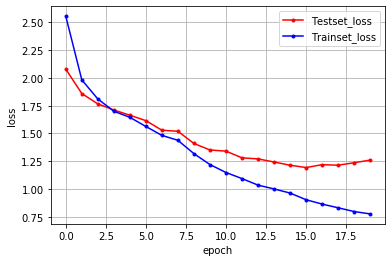

In [30]:
# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()